
## CNN With Custom Images

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.


This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
pwd

'/home/caliskanahmet6'

Datayi almak icin dosya yolunu yaz :

In [3]:
my_data_dir = '/home/caliskanahmet6/cell_images'
# '\\home\caliskanahmet6\\cell_images     --> for windows

__os -->__ Python' in bir kutuphanesi. Opreation System ile etkilesime gecmemizi saglar.

os' in listdir komutu, verilen yoldaki klasorleri listeler :

In [4]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['test', 'train']

Test ve train isimli iki tane resim dosyamiz var :

Test ve train dosyalarini ayri ayri cekmek icin bunlarin yollarini da degiskene atadik :

In [5]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [6]:
os.listdir(test_path)

['parasitized', 'uninfected']

Train ve test setlerinde 'uninfected', 'parasitized' isimli 2' ser adet klasor daha var. Ilerleyen asamalarda __flow_from_directory__ fonksiyonunu cagiracagiz; bu fonksiyon klasorlerin icindeki resimleri ayri class' lar olarak cekecek.

In [7]:
os.listdir(train_path)

['parasitized', 'uninfected']

Train dosyasinin icindeki parasitized klasorundeki resimlerden ilk 20' sini yazdirdik :

In [8]:
os.listdir(train_path+'parasitized')[:20]

['C166P127ThinF_IMG_20151117_195030_cell_219.png',
 'C131P92ThinF_IMG_20151004_151001_cell_121.png',
 'C180P141NThinF_IMG_20151201_163702_cell_185.png',
 'C124P85ThinF_IMG_20151002_153825_cell_193.png',
 'C176P137NThinF_IMG_20151201_122444_cell_124.png',
 'C128P89ThinF_IMG_20151004_131753_cell_130.png',
 'C70P31_ThinF_IMG_20150819_141730_cell_95.png',
 'C39P4thinF_original_IMG_20150622_114609_cell_13.png',
 'C183P144NThinF_IMG_20151201_223208_cell_119.png',
 'C91P52ThinF_IMG_20150821_124739_cell_172.png',
 'C175P136NThinF_IMG_20151127_141253_cell_246.png',
 'C133P94ThinF_IMG_20151004_154919_cell_119.png',
 'C136P97ThinF_IMG_20151005_143329_cell_112.png',
 'C68P29N_ThinF_IMG_20150819_133350_cell_188.png',
 'C39P4thinF_original_IMG_20150622_112119_cell_14.png',
 'C117P78ThinF_IMG_20150930_214629_cell_102.png',
 'C118P79ThinF_IMG_20151002_110609_cell_2.png',
 'C99P60ThinF_IMG_20150918_141314_cell_104.png',
 'C177P138NThinF_IMG_20151201_143704_cell_178.png',
 'C99P60ThinF_IMG_20150918_1415

Train dosyasinin icinden 7. resmi cagirdik. Bu resmin path yolunu bir asagidaki kodda para_cell degiskenine attik :

In [9]:
os.listdir(train_path+'parasitized')[7]

'C39P4thinF_original_IMG_20150622_114609_cell_13.png'

In [10]:
para_cell = train_path+'parasitized'+'/C100P61ThinF_IMG_20150918_144104_cell_169.png'

__imread -->__ Resimleri file' dan okur, array' e cevirir. Daha sonra bu array' i image olarak yazdirabiliriz :

In [11]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

imread' i bir degiskene atayip __imshow__ ile gorsele cevirdik :

In [13]:
para_img= imread(para_cell)

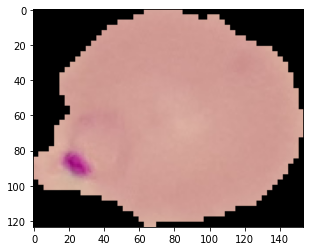

In [14]:
plt.imshow(para_img)

Bu resmin boyutu 124x154 imis, 3 channel' i varmis (RGB=Renkli resim) :

In [16]:
para_img.shape

(124, 154, 3)

Datadaki resimlerin hepsinin boyutu ayni degil. Bu haliyle model calismaz, cunku modeldeki input_shape' ler farkli olacak. Bunlarin shape' lerini ilerleyen asamalarda esitleyecegiz.

Train dosyasi icindeki 'uninfected' class' ina ait ilk 20 sample' i yazdirdik :

In [17]:
os.listdir(train_path+'uninfected')[:20]

['C140P101ThinF_IMG_20151005_205922_cell_52.png',
 'C188P149ThinF_IMG_20151203_134319_cell_159.png',
 'C77P38ThinF_IMG_20150601_155125_cell_16.png',
 'C239ThinF_IMG_20151127_113202_cell_250.png',
 'C51AP12thinF_IMG_20150724_154330_cell_104.png',
 'C123P84ThinF_IMG_20151002_152144_cell_43.png',
 'C57P18thinF_IMG_20150729_110457_cell_2.png',
 'C33P1thinF_IMG_20150619_115808a_cell_62.png',
 'C46P7ThinF_IMG_20151130_210309_cell_95.png',
 'C240ThinF_IMG_20151127_115223_cell_167.png',
 'C108P69ThinF_IMG_20150924_224616_cell_77.png',
 'C57P18thinF_IMG_20150729_110457_cell_78.png',
 'C230ThinF_IMG_20151112_150329_cell_184.png',
 'C225ThinF_IMG_20151112_113915_cell_12.png',
 'C64P25N_ThinF_IMG_20150818_152337_cell_51.png',
 'C103P64ThinF_IMG_20150918_164553_cell_80.png',
 'C49P10thinF_IMG_20150724_102330_cell_109.png',
 'C56P17thinF_IMG_20150728_160438_cell_16.png',
 'C79P40ThinF_IMG_20150817_102823_cell_7.png',
 'C233ThinF_IMG_20151112_161024_cell_32.png']

7. resme giden yolu bir degiskene atadik ve imread bu resmi numpy olarak okudu ve imshow ile okunabilir hale geldi :

In [18]:
uninfected_cell_path = train_path+'uninfected/'+os.listdir(train_path+'uninfected')[7]

In [19]:
uninfected_cell_path

'/home/caliskanahmet6/cell_images/train/uninfected/C33P1thinF_IMG_20150619_115808a_cell_62.png'

In [20]:
imread(uninfected_cell_path)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

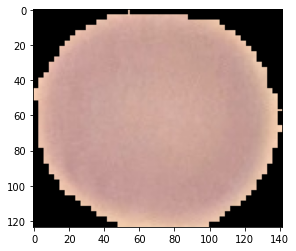

In [21]:
uninfected_cell = imread(uninfected_cell_path)
plt.imshow(uninfected_cell)

**Let's check how many images there are.**

'parasitized' dosyasindaki image sayisi :

In [22]:
len(os.listdir(train_path+'parasitized'))

12480

'uninfected' dosyasindaki image sayisi :

In [23]:
len(os.listdir(train_path+'uninfected'))

12481

Her bir class' tan esit sayida var, dengeli bir dataseti.

**Let's find out the average dimensions of these images.**

Datadaki image' lerin shape' leri esit degil :

In [24]:
uninfected_cell.shape

(124, 142, 3)

In [25]:
para_img.shape

(124, 154, 3)

For döngüsü ile 'uninfected' image' leri imread ile numpy array haline cevirdik. Bu image' ler 3 boyutlu idi (en-boy-kanal sayisi). Bunlarin her birisini img.shape ile sirayla d1, d2 ve _' e atadik. En ve boy bilgilerini x ve y listelerine attik :

In [26]:
x = []
y = []
for image in os.listdir(test_path+'uninfected'):
    
    img = imread(test_path+'uninfected/'+image)
    d1,d2,_ = img.shape
    x.append(d1)
    y.append(d2)

In [27]:
y[:20]

[151,
 124,
 130,
 142,
 115,
 142,
 130,
 136,
 151,
 127,
 136,
 106,
 109,
 130,
 142,
 133,
 70,
 175,
 151,
 130]

In [28]:
x[:20]

[130,
 115,
 109,
 121,
 136,
 130,
 154,
 121,
 163,
 148,
 136,
 91,
 115,
 136,
 118,
 157,
 94,
 121,
 124,
 139]

y degerlerine baktik, hepsi birbirinden farkli. Scatterplot ile de degerlerin yogunlastigi yerlere baktik. Resimleri ayni boyuta getirmek icin orta degerde bir boyut secmemiz gerekir. Bu yuzden x ve y' nin mean degerlerine baktik ve boyutun 130x130 olmasinda karar kıldık :

/opt/conda/envs/tfgpu/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

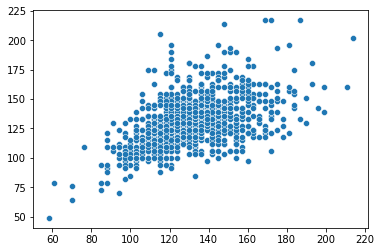

In [29]:
sns.scatterplot(x,y)

In [30]:
np.mean(x)

130.92538461538462

In [31]:
np.mean(y)

130.75

Karar verdigimiz boyut olan 130x130x3' u daha sonra kullanmak uzere bir degiskene atadik :

In [32]:
image_shape = (130,130,3)

## Preparing the Data for the model

'uninfected' ve 'parasitized' max degerlerine baktik, degerler 0-255 arasinda degil zaten scale edilmis durumdalar. Bu yuzden scale uygulamamiza gerek yok. Eger scale edilmemis olsaydi asagida __rescale=1/255__ kodunu da calistiracaktik ve resimlerin pixel degerlerini 255 oraninda kucultecekti :

In [34]:
uninfected_cell.max()

0.99607843

In [35]:
para_img.max()

0.8901961

Image' lerde __ratio__, en ve boyun birbirine oranidir. Scale islemi yaparken ratio sabit tutulmazsa resimdeki görüntü bozulur. Tensorflow bu sorunun önüne __ImageDataGenerator__ ile gecmis. Bu class, resimleri scale ederken 'smart resize' denen bir ozellik kullanir. Bununla resimler rastgele sekilde bozulur fakat data sayisi artmaz.

ImageDataGenerator, resimleri rastgele bozarak mukemmel olmaktan cikarir, cunku gercek hayatta karsimiza cikan resimler her zaman yuksek kalitede olmayabilir. ImageDataGenerator icindeki bircok parametre de bunun icin vardir. Bizim verdigimiz ölçülerde resmi bozar (Resmi karartir, zoom yapar, genisligi degistirir, rotate eder...) Bu sekilde model, kötü resimlerle egitilir ve genel bilgi alarak resmi ezberlemez. 

ImageDataGenerator resimlerin tamamini bozup memory' de tutmaz. Bu islemi batch batch yapar ve her batch icin rastgele yapar. Tum batch' i rastgele islemlerle donusturup onu return eder, orjinal datayi hicbir sekilde modele vermez (Orjinal resmi modele göstermez). 

__resize --->__ Resimler standart yollarla scale edilirken ratio bozulur. Bu cogu zaman problem olmaz ama GAN ile egitim yapiliyorsa problemdir. Cünkü GAN, kendisine verilen datayi birebir kopyalamaya calisir. __preserve_acpect_ratio__ ile ratio bozulmadan islem yapilirsa da resimler istedigimiz boyutta olmaz. Çünkü resize fonksiyonu image' leri crop etmez, sadece scale up veya scale down yapar. Bu sorunlardan dolayi Tensorflow __smart_resize__ fonksiyonunu gelistirmistir. Bu fonksiyon ratio' yu bozmadan istedigimiz boyutlarda resim verir. Bu islemi ImageDataGenerator otomatik olarak yapar.

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
#help(ImageDataGenerator)

__rotation_rate --->__ Resimleri en fazla su oranda rotate et. (Burada 0-15 arasinda rotate eder.)

__width_shift_range__ and __height_shift_range --->__ Enini ve boyunu verilen orandan fazla kaydirma (Burada 0.10' a kadar istedigi oranda kaydirabilir. 0.10 verdigimiz max deger. Her resimde en yuksek 0.10 olacak sekilde rastgele bir deger secer)

__shear_range --->__ Resmi yirtar.

__zoom_range --->__ En fazla bu oranda zoom in veya zoom out yap.

Verilen bu parametrelerin kacini ayni anda bir resme uygulayacagina her batch icin ayri ayri rastgele karar verir. Bir batch' in sirasi gelmeden karar vermez, islem baslarken karar verir.

In [38]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               #rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

Datadaki image' in orjinal hali :

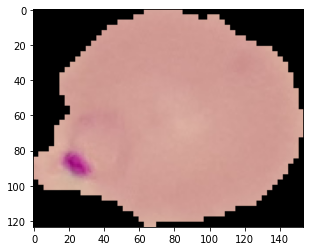

In [39]:
plt.imshow(para_img)

ImageDataGenerator class' inin __random_transform__ denen bir metodu var. Yukaridaki image' i bunun icine verdi. Bu image' i rastgele bir bicimde degistirdi. (Gözlemlerimize göre; zoom in yapmis, rotate etmis..)

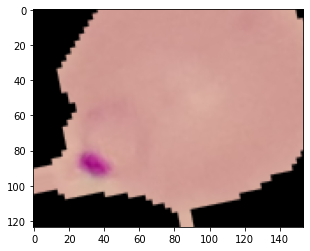

In [40]:
plt.imshow(image_gen.random_transform(para_img))

__flow_from_directory__ ile train ve test klasorlerinin altindaki resimleri okuduk. path bilgisini train' in icine kadar verdik, alt klasörleri kendisi okudu. Bu fonksiyon hangi resmi hangi klasörün altinda okuduysa bu bilgiyi aklinda tutar. Cikti olarak kac class ve kac image var bilgisini verdi :

In [41]:
image_gen.flow_from_directory(train_path)

Found 24959 images belonging to 2 classes.


In [43]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


ImageDataGenerator resimlerimizi okudu fakat memory' sine atmadi cunku cok fazla resim var ve buna hafizasi yetmez. Yani sadece resimlerin isimlerini, class' larini ve nerede olduklarini biliyor. Her batch icin sırası geldiginde okuma islemini yapacak.

# Creating the Model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [45]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu',))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu',))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu',))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Burdan sonra fully connected asamasina gececegi icin son layer' da filtre sayisini biraz düşürdük.
# !! x ve y boyutlari her pooling isleminde düştü. !!


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Sadece 1 kere dropout kullandik :
model.add(Dropout(0.5))

# Binary classification' da tek nöron yeter : 
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2022-03-14 18:32:09.580785: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-14 18:32:10.250378: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38394 MB memory:  -> device: 0, name: A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capability: 8.0


__!!__ Model overfit olmadigi icin BatchNormalization kullanmadik. __!!__

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 130, 130, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 65, 65, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 65, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 65, 65, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 256)       2

## Early Stopping

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

Üst üste 5 epoch boyunca val_los iyilesmezse modeli durdur :

In [48]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

## Training the Model

In [49]:
#help(image_gen.flow_from_directory)

Yukarida gosterdigimiz __flow_from_directory__' i bir degiskene atadik. Resimleri train_path' ten al; sonraki kodda da ayni islemi test_path icin yaptik.

__target_size=(130,130) --->__ Yukarida tanimladigimiz image_size' i buraya vermedik cunku onda en-boy-z degeri vardi. Fakat burda z degeri isimize yaramayacak, resimleri nasil rescale edecek o bilgiyi istiyor. Bu yuzden sadece boyutlari verdik.

__color_mode='rgb' --->__ Resimler renkli

__batch_size=batch_size --->__ 32 yerine 64 de verebilirdik fakat o zaman GPU memory' i cok yorar.(Genelde CNN' de 64' ten yukari yapilmaz, 8-64 arasi verilir)

__class_mode='binary' --->__ Datada 2 class var.

__shuffle=True --->__ Resimleri sirayla degil karisik al. (Bir class' i bitirip digerine gecmez, karisik olarak alir)

In [50]:
batch_size = 32
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(130,130),
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=True, seed=42)

Found 24959 images belonging to 2 classes.


In [51]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(130,130),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=True, seed=42)

Found 2600 images belonging to 2 classes.


__train_image_gen__ ve __test_image_gen,__ hangi resim nerde bilgisini hafizalarinda tutuyorlar; resimlerin kendisini hafizalarina yüklemediler :

In [52]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [53]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [55]:
STEP_SIZE_TRAIN=train_image_gen.n//train_image_gen.batch_size
STEP_SIZE_TEST=test_image_gen.n//test_image_gen.batch_size

In [56]:
STEP_SIZE_TRAIN, STEP_SIZE_TEST

(779, 81)

Yukarida total image sayisini batch' e böldük ve her bir epoch' un kac iterasyon yapacagini bulduk. Train setinde 779 iterasyon olacakmis. Eger 779 küsur bir sayi cikarsa model bunu 780' e tamamlar. Modele 'Eger küsuratli bir sayi cikarsa tamamlama, at' dedik. Resimleri rastgele sectigi icin tamamlama kisminda ayni resmi bir daha secmesin diye bu islemi yaptik. (Evaluate isleminde de aynisini yapacagiz)

In [57]:
results = model.fit(train_image_gen,epochs=20,
                    validation_data=test_image_gen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_steps=STEP_SIZE_TEST,
                    callbacks=[early_stop])

Epoch 1/20


2022-03-14 18:40:32.388747: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2022-03-14 18:40:34.677382: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


779/779 [==============================] - 121s 150ms/step - loss: 0.7261 - accuracy: 0.5198 - val_loss: 0.7091 - val_accuracy: 0.5123
Epoch 2/20
779/779 [==============================] - 116s 149ms/step - loss: 0.6931 - accuracy: 0.5142 - val_loss: 0.6930 - val_accuracy: 0.5004
Epoch 3/20
779/779 [==============================] - 116s 149ms/step - loss: 0.5809 - accuracy: 0.6631 - val_loss: 0.2065 - val_accuracy: 0.9375
Epoch 4/20
779/779 [==============================] - 116s 149ms/step - loss: 0.1912 - accuracy: 0.9454 - val_loss: 0.1835 - val_accuracy: 0.9456
Epoch 5/20
779/779 [==============================] - 116s 148ms/step - loss: 0.1727 - accuracy: 0.9491 - val_loss: 0.1615 - val_accuracy: 0.9491
Epoch 6/20
779/779 [==============================] - 116s 149ms/step - loss: 0.1611 - accuracy: 0.9512 - val_loss: 0.1650 - val_accuracy: 0.9487
Epoch 7/20
779/779 [==============================] - 116s 149ms/step - loss: 0.1588 - accuracy: 0.9510 - val_loss: 0.1562 - val_accura

# Evaluating the Model

Her epoch' ta val_accuracy skoru artmış :

In [58]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.726144,0.519798,0.709134,0.512346
1,0.693120,0.514181,0.693033,0.500386
2,0.580935,0.663056,0.206466,0.937500
3,0.191235,0.945441,0.183463,0.945602
4,0.172671,0.949131,0.161545,0.949074


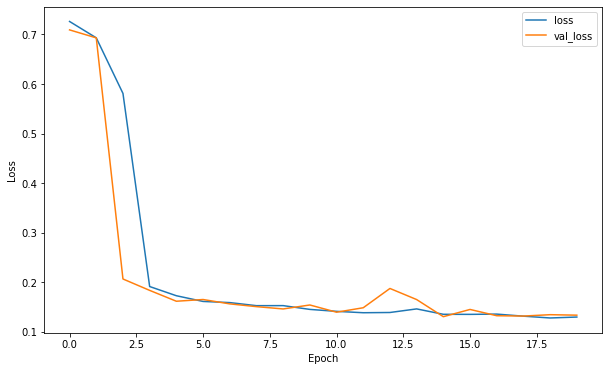

In [59]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

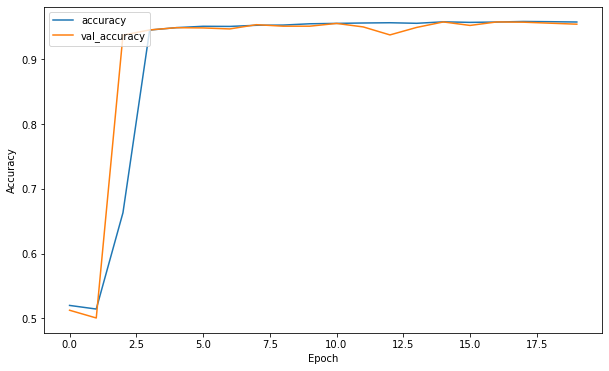

In [60]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [61]:
model.metrics_names

['loss', 'accuracy']

we should sample the images in the validation set exactly once(if you are planning to evaluate, you need to change the batch size of the valid generator to 1 or something that exactly divides the total num of samples in validation set), but the order doesn’t matter so let “shuffle” be True as it was earlier.

In [62]:
model.evaluate(test_image_gen,
steps=STEP_SIZE_TEST)

81/81 [==============================] - 11s 131ms/step - loss: 0.1329 - accuracy: 0.9587


[0.13294440507888794, 0.9587191343307495]

In [63]:
from tensorflow.keras.preprocessing import image

In [79]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(130,130),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=False, seed=42)

Found 2600 images belonging to 2 classes.


In [80]:
pred_probabilities = model.predict_generator(test_image_gen)

/tmp/ipykernel_4179/3998936794.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_probabilities = model.predict_generator(test_image_gen)


In [81]:
pred_probabilities

array([[6.6800117e-03],
       [1.2141887e-04],
       [6.9812867e-03],
       ...,
       [9.5306808e-01],
       [9.5478594e-01],
       [6.8693823e-01]], dtype=float32)

In [83]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [88]:
predictions = pred_probabilities > 0.5

In [89]:
predictions[:100]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1300
           1       0.95      0.98      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



In [92]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1231,   69],
       [  30, 1270]])

In [93]:
#model.save('malaria_model.h5')

# Predicting on an Image

Train datasindaki bir image' in path yolunu para_cell degiskenine tanimlamistik :

In [94]:
para_cell

'/home/caliskanahmet6/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png'

image' in load_img metodunu kullanarak para_cell' i cagirdik. target_size' da daha önce tanimladigimiz image_shape degiskenini atadik. Boylece shape 130x130x3 oldu :

In [95]:
my_image = image.load_img(para_cell,target_size=image_shape)

load_img yerine asagidaki gibi smart_size yöntemini de kullanabiliriz :

In [97]:
#tf.keras.preprocessing.image.smart_resize(para_img, image_shape)

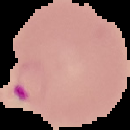

In [98]:
my_image

In [99]:
type(my_image)

PIL.Image.Image

In [100]:
my_image = image.img_to_array(my_image)

In [101]:
type(my_image)

numpy.ndarray

In [102]:
my_image.shape

(130, 130, 3)

Resmimiz 3 boyutlu fakat modelimiz 4 boyutta egitildi. Boyutun 1x130x130x3 olmasi gerekiyor. Burdaki 1 sayisi ile kac resim oldugu bilgisini modele veriyoruz.

__!!!__ Prediction yapilacak olan resim resize edilmeli ve resmin boyutu da modeldeki boyuta cevrilmeli __!!!__

Numpy' in __expand_dims__ isimli bir fonksiyonu var. Bu fonksiyon, array' in belirtilen yerine bir boyut ekler. Biz 0. axis'e eklemesini söyledik. Böylece boyut 1,130,130,3 olacak ve modelle ayni boyuta gelecek. Bu haliyle sample' i modele verip prediction alabiliriz :

In [103]:
my_image = np.expand_dims(my_image, axis=0)

In [104]:
my_image.shape

(1, 130, 130, 3)

In [105]:
model.predict(my_image)

array([[0.02370634]], dtype=float32)

In [106]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [107]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}